In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import cluster

#### Load Data 

In [2]:
#reading data into dataframe 
renew_data = pd.read_csv('data.csv')

#### Data Overview

In [1]:
#basic overview of data 

renew_data.head()

In [4]:
renew_data.shape

(10285, 33)

In [5]:
renew_data.info()
# Number_Of_Attempted_Policy_Ammendments & Vehicle_Liability_Category have Null values 
# Some data attributes have incorrect data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 33 columns):
Renewal_Date                              10285 non-null int64
Sale                                      10285 non-null int64
Main_Income                               10285 non-null float64
Addon_Income                              10285 non-null float64
Finance_Income                            10285 non-null float64
Gross_Price                               10285 non-null float64
Last_Yr_Gross_Price                       10285 non-null float64
Net_Premium                               10285 non-null float64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null object
Renewal_Offer_Type                        10285 non-null object
Number_Of_Attempted_Policy_Ammendments    3000 non-null float64
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285 non-null 

In [6]:
renew_data.describe()

,Renewal_Date,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,Number_Of_Attempted_Policy_Ammendments,...,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_No_Of_Doors,Vehicle_Engine_Size,No_Claims_Discount,Credit_Score,Previous_Discount
count,1.028500e+04,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,3000.000000,...,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000
mean,2.016065e+07,0.611667,63.419097,24.409025,39.867803,602.561076,540.051141,420.729635,1.164706,1.950000,...,0.244920,3.364123,7872.211959,7.958192,2.918036,4.534565,1754.814487,7.378901,567.950899,0.100826
std,3.211345e+02,0.487395,88.220674,22.288245,41.618577,344.620211,328.728600,234.501513,1.634392,1.909288,...,0.488694,1.141802,3536.936127,4.664826,2.713034,0.858694,444.397028,2.677761,385.202459,0.301113
min,2.016010e+07,0.000000,-906.200000,0.000000,0.000000,0.000000,139.880000,0.000000,0.000000,1.000000,...,0.000000,1.000000,200.000000,0.000000,0.000000,2.000000,0.000000,0.000000,426.000000,0.000000
25%,2.016040e+07,0.000000,9.340000,6.100000,0.000000,378.120000,334.410000,274.100000,0.000000,1.000000,...,0.000000,3.000000,5000.000000,4.000000,1.000000,4.000000,1461.000000,6.000000,537.000000,0.000000
50%,2.016063e+07,1.000000,38.510000,19.630000,37.920000,508.440000,440.390000,358.830000,1.000000,1.000000,...,0.000000,4.000000,7999.000000,8.000000,2.000000,5.000000,1686.000000,9.000000,558.000000,0.000000
75%,2.016091e+07,1.000000,96.900000,35.640000,61.810000,724.820000,629.970000,497.160000,2.000000,2.000000,...,0.000000,4.000000,10000.000000,11.000000,4.000000,5.000000,1995.000000,9.000000,575.000000,0.000000
max,2.016123e+07,1.000000,700.000000,149.876600,398.050000,4233.050000,4278.990000,3118.680000,9.000000,25.000000,...,2.000000,7.000000,25000.000000,33.000000,29.000000,5.000000,4701.000000,9.000000,9999.000000,1.000000


High Level Observations:
1. Renewals : Somewhere between 25-50% people did not renew
2. Main Income : There is a very high variation in this variable (Business insight - shows reliance on few customers for income)
3. Finance Income : The mean of Financing Income is about 60% of mean of Main Income - which tells us that policies paid in  installment  are a lucrative source of income (Business insight - installment plans could be encouraged)
4. Addon Income : The mean of Addon Income is much lower than Financing Income (Business insight - assess if there is proportional value from investing into Addon products)
5. Gross Price vs. Last year gross price : There is about 10% increase in the mean price offered to the customers  (Business insight - i. check if the increase is higher than average increase in wages and inflation for the economy, and if so what are the reasons behind the sharp increase (is that due to riskier customer profile) ii. should see if this is a driver for renewal/ IPO
6. Previous Renewals : Majority of the customers have renewed only once (Business Insight - either most of the customers are new OR people are dropping out after year 1 which is where maximum focus should be to retain customers)

#### Changing to Correct data types 

In [7]:
renew_data=renew_data.astype({'Sale':object, 
                              'Geographical_Area':object, 
                              'Overnight_Parking':object, 
                              'Previous_Discount':object
                             })

renew_data['Renewal_Date']= pd.to_datetime(renew_data.Renewal_Date, format='%Y%m%d')

renew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 33 columns):
Renewal_Date                              10285 non-null datetime64[ns]
Sale                                      10285 non-null object
Main_Income                               10285 non-null float64
Addon_Income                              10285 non-null float64
Finance_Income                            10285 non-null float64
Gross_Price                               10285 non-null float64
Last_Yr_Gross_Price                       10285 non-null float64
Net_Premium                               10285 non-null float64
Previous_Renewals                         10285 non-null int64
First_Contact_Channel                     10285 non-null object
Renewal_Offer_Type                        10285 non-null object
Number_Of_Attempted_Policy_Ammendments    3000 non-null float64
Diver_Age                                 10285 non-null int64
Driver_Marital_Status                     10285

#### Missing Value Treatment
- Vehicle_Liability_Category  - AS this is a categorical variable, we can impute it using the median of the variable. But as over 40% of data points are missing, we will replace them in same ratio of categories as in available data 
- Number_Of_Attempted_Policy_Ammendments - <30% data points available , while remianing are "Null". This variable represents the number of amendments (e.g. additional drivers etc.) done to policy in the last year.Intuitively it seems unlikely that many people would do amendments within a year. Also we notice that there is no category for "0 (zero)" amendments. Based on both these points, i assume "Null" actually means "0(zero)", and is just represented as such in the data source. Hence , i will replace all "Null" values with "0".


###### Vehicle_Liability_Category

In [8]:

print (renew_data['Vehicle_Liability_Category'].value_counts(normalize=True, dropna=False))
print (renew_data['Vehicle_Liability_Category'].value_counts(normalize=True))

NaN    0.402528
6      0.065143
7      0.058629
4      0.056490
5      0.053184
8      0.041128
11     0.040739
12     0.039378
10     0.036753
14     0.035780
3      0.034516
9      0.027516
13     0.026738
15     0.022460
2      0.015751
16     0.015265
17     0.012445
1      0.009334
18     0.004570
19     0.001167
20     0.000292
       0.000194
Name: Vehicle_Liability_Category, dtype: float64
6     0.109032
7     0.098129
4     0.094548
5     0.089015
8     0.068836
11    0.068186
12    0.065907
10    0.061513
14    0.059886
3     0.057771
9     0.046054
13    0.044752
15    0.037592
2     0.026363
16    0.025549
17    0.020830
1     0.015622
18    0.007648
19    0.001953
20    0.000488
      0.000325
Name: Vehicle_Liability_Category, dtype: float64


In [9]:
renew_data['Vehicle_Liability_Category'] = renew_data['Vehicle_Liability_Category'].fillna(pd.Series(np.random.choice(['6','7','4','5','8','11','12','10','14','3','9','13',
                                                                    '15','2','16','17','1','18','19','20'], 
                                                  p=[0.109032+0.000325+0.000001, 0.098129,0.094548,0.089015,0.068836,0.068186,0.065907,
                                                     0.061513,0.059886,0.057771,0.046054,0.044752,0.037592,0.026363,
                                                     0.025549,0.020830,0.015622,0.007648,0.001953,0.000488], 
                                                  size=len(renew_data))))

In [10]:
print (renew_data['Vehicle_Liability_Category'].value_counts(normalize=True, dropna=False))


6     0.108216
7     0.101896
4     0.095284
5     0.085270
8     0.071561
11    0.069227
12    0.064074
10    0.061643
14    0.060671
3     0.055615
9     0.045795
13    0.044823
15    0.037336
2     0.025377
16    0.025085
17    0.021099
1     0.014973
18    0.009237
19    0.002139
20    0.000486
      0.000194
Name: Vehicle_Liability_Category, dtype: float64


###### Number_Of_Attempted_Policy_Ammendments 

In [11]:

renew_data.Number_Of_Attempted_Policy_Ammendments.unique() #no data points for "0" amendments 

array([nan,  1.,  3.,  2., 10.,  4.,  5., 11.,  6.,  7., 21., 13.,  8.,
       16., 18., 12., 14.,  9., 25., 15., 24., 20.])

In [12]:
renew_data['Number_Of_Attempted_Policy_Ammendments']=renew_data['Number_Of_Attempted_Policy_Ammendments'].fillna(0)


In [13]:
renew_data.Number_Of_Attempted_Policy_Ammendments.unique()

array([ 0.,  1.,  3.,  2., 10.,  4.,  5., 11.,  6.,  7., 21., 13.,  8.,
       16., 18., 12., 14.,  9., 25., 15., 24., 20.])

### Problem Statement 1 :
Which segments of customers perform better than others and why? 
    - In this case performance is defined as the expected income per offer (IPO).
    - IPO= Sale *(Main_Income + Addon_Income + Finance_Income)
    

#### Create calculated fields

- New field created for IPO as per above definition 
- Additional field caculated as change in Price between this year and last - to check if it is a driver for IPO


In [14]:
renew_data['Total_Income'] = renew_data.Main_Income + renew_data.Addon_Income+ renew_data.Finance_Income 
renew_data['IPO'] = renew_data.Total_Income * renew_data.Sale
renew_data['Price_Change'] = (renew_data.Gross_Price - renew_data.Last_Yr_Gross_Price)/ renew_data.Last_Yr_Gross_Price
renew_data=renew_data.astype({'IPO':float})

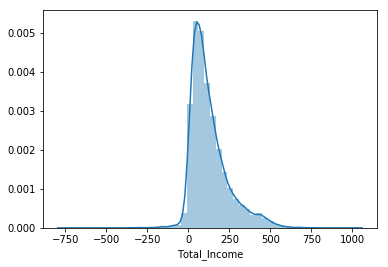

In [15]:
import seaborn as sns
sns.distplot(renew_data.Total_Income)

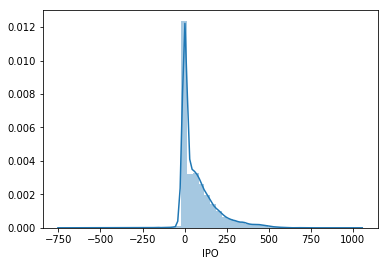

In [16]:
sns.distplot(renew_data.IPO)

#### Split data into Numerical and Categorical variables 

Split the Numerical and Categorical Variables before Outlier treatment

In [17]:
num_renew = renew_data.select_dtypes(include=np.number)
num_renew.columns

Index(['Main_Income', 'Addon_Income', 'Finance_Income', 'Gross_Price',
       'Last_Yr_Gross_Price', 'Net_Premium', 'Previous_Renewals',
       'Number_Of_Attempted_Policy_Ammendments', 'Diver_Age',
       'Driver_Years_Licence_Held', 'Number_Of_Named_Drivers',
       'Annual_Mileage', 'Vehicle_Age', 'Vehicle_Years_Owned',
       'Vehicle_No_Of_Doors', 'Vehicle_Engine_Size', 'No_Claims_Discount',
       'Credit_Score', 'Total_Income', 'IPO', 'Price_Change'],
      dtype='object')

In [18]:
cat_renew = renew_data.select_dtypes(include=np.object)
cat_renew.columns

Index(['Sale', 'First_Contact_Channel', 'Renewal_Offer_Type',
       'Driver_Marital_Status', 'Driver_Occupation_Status',
       'Driver_Licence_Type', 'Geographical_Area', 'Overnight_Parking',
       'Vehicle_Body_Type', 'Vehicle_Fuel_Type', 'Vehicle_Transmission',
       'Vehicle_Liability_Category', 'Previous_Discount', 'Data_Quality'],
      dtype='object')

#### Outlier treatment for numerical variables

In [19]:
def var_summary(x):
    return pd.Series([x.count(), x.mean(),   x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'MEAN', 'MIN', 'P1' , 'P5' ,'P95' ,'P99' ,'MAX'])

num_renew_summary=num_renew.apply(lambda x: var_summary(x))
num_renew_summary.T

,N,MEAN,MIN,P1,P5,P95,P99,MAX
Main_Income,10285.0,63.419097,-906.20,-88.500800,-20.946000,252.660000,338.941200,700.000000
Addon_Income,10285.0,24.409025,0.00,0.000000,0.000000,67.576680,93.405552,149.876600
Finance_Income,10285.0,39.867803,0.00,0.000000,0.000000,118.200000,167.761600,398.050000
Gross_Price,10285.0,602.561076,0.00,17.670000,261.250000,1290.576000,1829.090000,4233.050000
Last_Yr_Gross_Price,10285.0,540.051141,139.88,197.721600,245.356000,1193.046000,1846.627200,4278.990000
Net_Premium,10285.0,420.729635,0.00,0.000000,197.542000,858.220000,1290.512400,3118.680000
Previous_Renewals,10285.0,1.164706,0.00,0.000000,0.000000,5.000000,7.000000,9.000000
Number_Of_Attempted_Policy_Ammendments,10285.0,0.568789,0.00,0.000000,0.000000,3.000000,6.000000,25.000000
Diver_Age,10285.0,47.775887,23.00,23.000000,26.000000,69.000000,75.000000,78.000000
Driver_Years_Licence_Held,10285.0,19.854740,0.00,1.000000,5.000000,35.000000,49.000000,61.000000


In [20]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

num_renew=num_renew.apply(lambda x: outlier_capping(x))

C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


#### Feature Selection -  Categorical Variables 

Bivariate scatter plots between categorical independant variables and IPO were created and : 
 
- For Vehicle Liability Category , IPO is spread across in value and density similarly across some classes. Based on this observation, these categories are being clubbed together to reduce the dimensionality 

- 3 categorical variables are being dropped as the spread in values and density are same across classes - hence these
variables do not add any information for the model

###### Vehicle Liability Category

In [21]:
renew_data['Vehicle_Liability_Category']= pd.to_numeric(renew_data['Vehicle_Liability_Category'], errors='coerce')        
renew_data.loc[renew_data['Vehicle_Liability_Category'] <=2, 'New_Vehicle_Liability'] = 1
renew_data.loc[renew_data['Vehicle_Liability_Category'] >=3, 'New_Vehicle_Liability'] = 2
renew_data.loc[renew_data['Vehicle_Liability_Category'] >=15, 'New_Vehicle_Liability'] = 3
renew_data.loc[renew_data['Vehicle_Liability_Category'] >=18, 'New_Vehicle_Liability'] = 4
#renew_data = renew_data.drop(['C'], axis =1)
#renew_data = renew_data.drop(['New_Vehicle_Libility'], axis =1)
renew_data=renew_data.astype({'New_Vehicle_Liability': object})
renew_data = renew_data.drop(['Vehicle_Liability_Category'], axis=1)
renew_data.head()

,Renewal_Date,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,...,Vehicle_Fuel_Type,Vehicle_Transmission,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality,Total_Income,IPO,Price_Change,New_Vehicle_Liability
0,2016-06-06,1,35.37,0.0000,35.41,376.77,381.53,269.42,8,I,...,P,M,9,581,0,OK,70.7800,70.7800,-0.012476,2
1,2016-07-04,0,117.11,14.5566,41.77,444.66,408.65,242.61,8,I,...,P,M,9,526,0,OK,173.4366,0.0000,0.088119,2
2,2016-08-03,1,106.92,43.5370,61.08,649.08,538.19,398.45,8,I,...,P,M,7,586,1,OK,211.5370,211.5370,0.206042,2
3,2016-07-05,1,194.65,99.8576,70.20,746.76,743.49,299.46,8,I,...,D,A,9,540,0,OK,364.7076,364.7076,0.004398,2
4,2016-03-02,1,32.98,19.0900,0.00,303.93,310.12,224.23,7,T,...,P,M,8,531,1,OK,52.0700,52.0700,-0.019960,2


In [22]:
cat_renew = renew_data.select_dtypes(include=np.object)
cat_renew.columns

Index(['Sale', 'First_Contact_Channel', 'Renewal_Offer_Type',
       'Driver_Marital_Status', 'Driver_Occupation_Status',
       'Driver_Licence_Type', 'Geographical_Area', 'Overnight_Parking',
       'Vehicle_Body_Type', 'Vehicle_Fuel_Type', 'Vehicle_Transmission',
       'Previous_Discount', 'Data_Quality', 'New_Vehicle_Liability'],
      dtype='object')

###### Drop some variables 

In [23]:
cat_renew_fs=cat_renew[cat_renew.columns.difference(['Vehicle_Fuel_Type', 'Vehicle_Transmission', 'Data_Quality'])]


#### Create Dummy variables

In [24]:
# Function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [25]:
#for c_feature in categorical_features
cat_renew_dummy=cat_renew[cat_renew.columns]
for c_feature in cat_renew_dummy.columns:
    cat_renew_dummy[c_feature] = cat_renew_dummy[c_feature].astype('category')
    cat_renew_dummy = create_dummies(cat_renew_dummy , c_feature )

In [26]:
for c_feature in cat_renew_fs.columns:
    cat_renew_fs[c_feature] = cat_renew_fs[c_feature].astype('category')
    cat_renew_fs = create_dummies(cat_renew_fs , c_feature )

C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
cat_renew_fs.head()

,Driver_Licence_Type_4,Driver_Licence_Type_5,Driver_Licence_Type_6,Driver_Licence_Type_Y,Driver_Licence_Type_Z,Driver_Marital_Status_B,Driver_Marital_Status_D,Driver_Marital_Status_M,Driver_Marital_Status_P,Driver_Marital_Status_S,...,Overnight_Parking_4,Overnight_Parking_5,Overnight_Parking_7,Previous_Discount_1,Renewal_Offer_Type_Passive,Sale_1,Vehicle_Body_Type_C,Vehicle_Body_Type_E,Vehicle_Body_Type_H,Vehicle_Body_Type_S
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,0,0,1,0


#### Feature Selection - Numerical variables 

###### Variance within features

In [131]:
#Check if there variance in each feature - drop the ones with zero / low variance 
num_features = num_renew.columns.difference( ['IPO', 'Total_Income'] )
num_renew[num_features].var(axis=0).round(2).sort_values()

# We are not dropping any variables based on this 

Price_Change                                     0.04
Number_Of_Named_Drivers                          0.24
Vehicle_No_Of_Doors                              0.74
Number_Of_Attempted_Policy_Ammendments           1.19
Previous_Renewals                                2.65
Vehicle_Years_Owned                              6.87
No_Claims_Discount                               7.04
Vehicle_Age                                     20.46
Driver_Years_Licence_Held                       80.00
Diver_Age                                      157.16
Addon_Income                                   476.84
Credit_Score                                  1088.12
Finance_Income                                1604.12
Main_Income                                   6841.13
Net_Premium                                  46580.20
Last_Yr_Gross_Price                          95842.67
Gross_Price                                 105354.89
Vehicle_Engine_Size                         180688.39
Annual_Mileage              

###### Correlation between features

Populating the interactive namespace from numpy and matplotlib


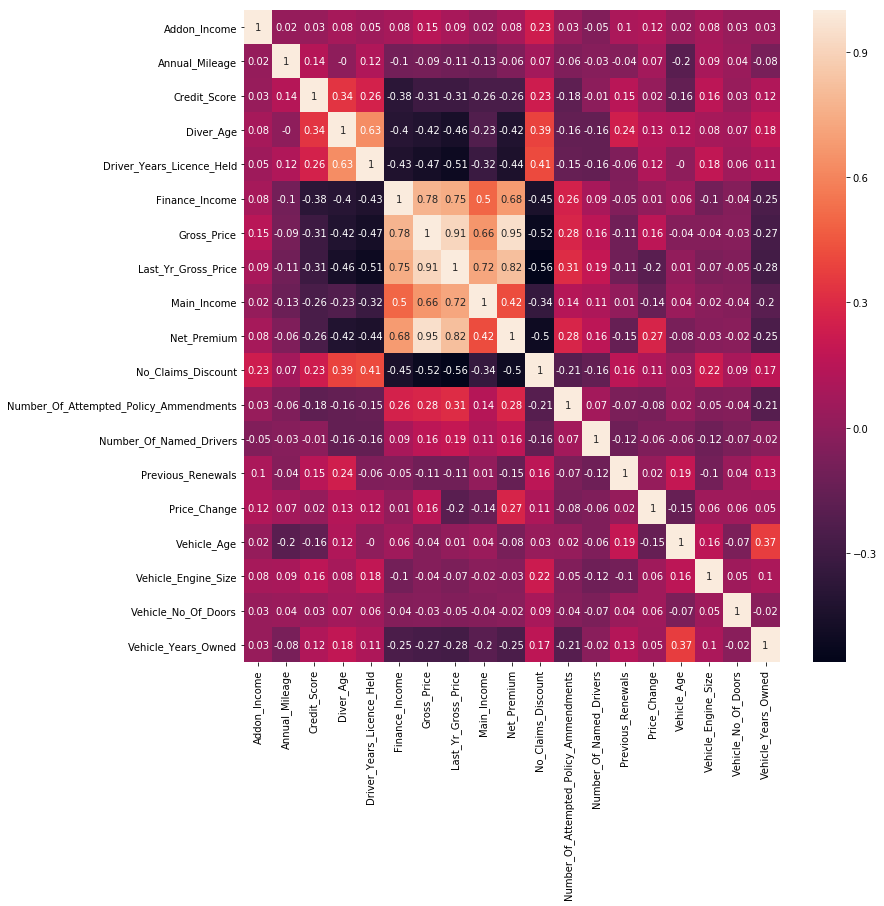

In [29]:
#Check for Numerical variables which are correlated to each other 

%pylab inline
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams['axes.grid'] = True
plt.gray()
sns.heatmap(num_renew[num_features].corr().round(2), annot = True)

In [30]:
num_corr=pd.DataFrame(num_renew[num_features].corr().round(2))
columns = np.full((num_corr.shape[0],), True)
for i in range(num_corr.shape[0]):
    for j in range(i+1,num_corr.shape[0]):
        if abs(num_corr.iloc[i,j]) >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = num_corr.columns[columns]
num_renew_fs = num_renew[selected_columns]

#### Combine into new DataFrame with Selected Features

In [31]:
renew_fs= pd.concat([cat_renew_fs, num_renew_fs, num_renew['IPO'], num_renew['Total_Income']],  axis=1)
renew_fs.columns

Index(['Driver_Licence_Type_4', 'Driver_Licence_Type_5',
       'Driver_Licence_Type_6', 'Driver_Licence_Type_Y',
       'Driver_Licence_Type_Z', 'Driver_Marital_Status_B',
       'Driver_Marital_Status_D', 'Driver_Marital_Status_M',
       'Driver_Marital_Status_P', 'Driver_Marital_Status_S',
       'Driver_Marital_Status_W', 'Driver_Occupation_Status_F',
       'Driver_Occupation_Status_H', 'Driver_Occupation_Status_N',
       'Driver_Occupation_Status_R', 'Driver_Occupation_Status_S',
       'Driver_Occupation_Status_U', 'First_Contact_Channel_T',
       'Geographical_Area_2', 'Geographical_Area_3', 'Geographical_Area_4',
       'Geographical_Area_5', 'Geographical_Area_6', 'Geographical_Area_7',
       'Geographical_Area_8', 'Geographical_Area_9', 'Geographical_Area_10',
       'Geographical_Area_11', 'Geographical_Area_12',
       'New_Vehicle_Liability_2.0', 'New_Vehicle_Liability_3.0',
       'New_Vehicle_Liability_4.0', 'Overnight_Parking_2',
       'Overnight_Parking_3', 'Over

In [32]:
#renew_fs.to_csv("check.csv")

#### Further Feature Selection using Linear Regression

-I ran LR with IPO as dependant variable :
    - WE get an acceptable R2 of 73% but thats when we include Sale_1 as an independant feature
    - If Sale_1 is excluded as a dependant varaible, the R2 of model falls to upper 30s%
-This is expected as Sale/ No Sale (1/0) has a dominant impact on IPO

-AS IPO is derived based on two main features - Sale and Total Income , and as Linear Regression is better suited to 
predict continuous variables - I decided to use this model to select features that impact Total Income 

In [33]:
feature_columns = renew_fs.columns.difference( [ 'IPO', 'Sale_1','Main_Income', 'Addon_Income', 'Finance_Income'] )

feature_columns1 = renew_fs.columns.difference( [ 'IPO', 'Sale_1', 'Main_Income', 'Addon_Income', 'Finance_Income', 'Total_Income'] )


In [34]:

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( renew_fs[feature_columns1],
                                                  renew_fs['Total_Income'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [35]:
import statsmodels.api as sm

In [36]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Income   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     338.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:26:49   Log-Likelihood:                -39435.
No. Observations:                7199   AIC:                         7.899e+04
Df Residuals:                    7141   BIC:                         7.938e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [38]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
from sklearn import metrics

print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

RMSE: 61.9625090222717


In [39]:
train_X=sm.add_constant(train_X)
y_pred = lm.predict(train_X)
from sklearn import metrics
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred)))

RMSE: 57.90858154440271


C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Observations from Linear Regression:
    - R2 shows that the model does a good job of explaining the variation in dependant variable 
    - The RMSE of test and train data set is similar which means there is no overfitting 
    - Durbin-Watson value shows there is low/ no auto-correlation in the model 
    
We will use the output from this model to select features (features with high absolute coefficient values)  for a further segmentation model 

In [40]:
#print('Parameters: ', (abs(lm.params)>=3).sort_values(ascending=False))
renew_LR_Income = pd.DataFrame(abs(lm.params), columns=['name']) 
renew_LR_columns=[renew_LR_Income[renew_LR_Income.iloc[:,0]>3].index]
renew_LR_columns 

LR_columns_cat = ['Driver_Licence_Type_4', 'Driver_Licence_Type_5',
        'Driver_Licence_Type_6', 'Driver_Marital_Status_M',
        'Driver_Marital_Status_S', 'Driver_Marital_Status_W',
        'Driver_Occupation_Status_F', 'Driver_Occupation_Status_R',
        'Driver_Occupation_Status_U', 'First_Contact_Channel_T',
        'Geographical_Area_11', 'Geographical_Area_3', 'Geographical_Area_4',
        'Geographical_Area_6', 'Geographical_Area_8', 'Geographical_Area_9',
        'New_Vehicle_Liability_3.0', 'New_Vehicle_Liability_4.0',
        'Overnight_Parking_3', 'Overnight_Parking_4', 'Overnight_Parking_5',
        'Previous_Discount_1', 
        'Renewal_Offer_Type_Passive', 'Vehicle_Body_Type_C',
        'Vehicle_Body_Type_S']

LR_columns_num = ['No_Claims_Discount','Number_Of_Attempted_Policy_Ammendments','Previous_Renewals', 'Price_Change']

renew_LR= pd.concat([renew_fs[LR_columns_cat],renew_fs[LR_columns_num], renew_fs['IPO']], axis=1)
renew_LR_cols = renew_LR.columns


renew_LR_num= pd.concat([renew_fs[LR_columns_num], renew_fs['IPO']], axis=1)


renew_LR_cols_num = renew_LR_num.columns



#### Scale data


    -Scale numercial features only before PCA
    -It is then combined with categorical dummy features

In [62]:

from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
LR_num_scaled=sc.fit_transform(renew_LR_num)
LR_num_scaled = pd.DataFrame(LR_num_scaled,  columns =['No_Claims_Discount','Number_Of_Attempted_Policy_Ammendments','Previous_Renewals', 'Price_Change', 'IPO'])

LR_scalednum_cat= pd.concat([renew_fs[LR_columns_cat], LR_num_scaled], axis=1)
LR_scalednum_cat.head()

C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sneha.Jain\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,No_Claims_Discount,Number_Of_Attempted_Policy_Ammendments,Previous_Renewals,Price_Change,IPO
0,0.607447,-0.489614,3.589298,-0.728311,-0.061602
1,0.607447,-0.489614,3.589298,-0.249554,-0.738497
2,-0.146410,-0.489614,3.589298,0.311669,1.284508
3,0.607447,-0.489614,3.589298,-0.648002,2.749334
4,0.230518,-0.489614,3.589298,-0.763929,-0.240533


#### PCA for Feature Selection

In [63]:
from sklearn.decomposition import PCA

###### PCA from Combined for Scaled Numerical and Categorical data 

In [66]:
var_ratio_LR={}
for n in range(1,10):
    pc=PCA(n_components=n)
    LR_pca=pc.fit(LR_scalednum_cat)
    var_ratio_LR[n]=sum(LR_pca.explained_variance_ratio_)

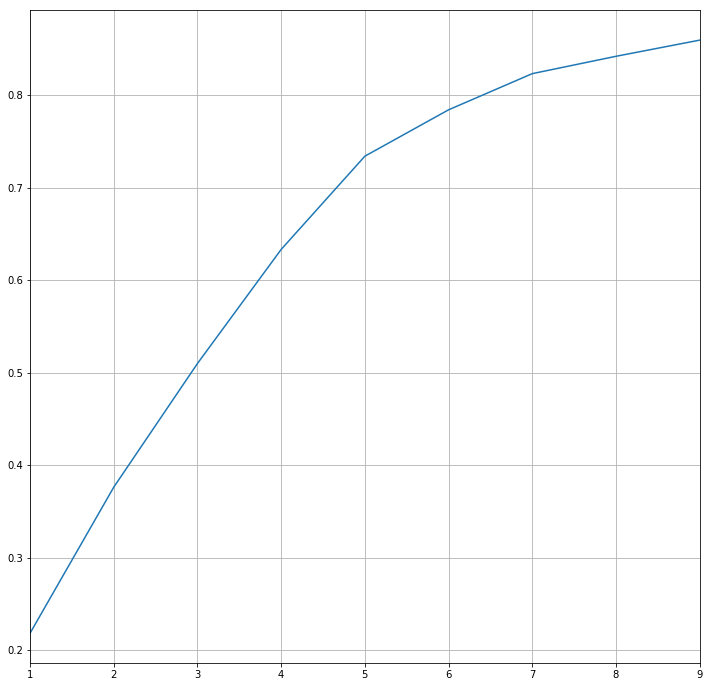

In [67]:
pd.Series(var_ratio_LR).plot()

###### PCA on only Categorcial data

In [45]:
var_ratio_cat={}
for n in range(1,15):
    pc=PCA(n_components=n)
    LR_cat_pca=pc.fit(renew_fs[LR_columns_cat])
    var_ratio_cat[n]=sum(LR_cat_pca.explained_variance_ratio_)

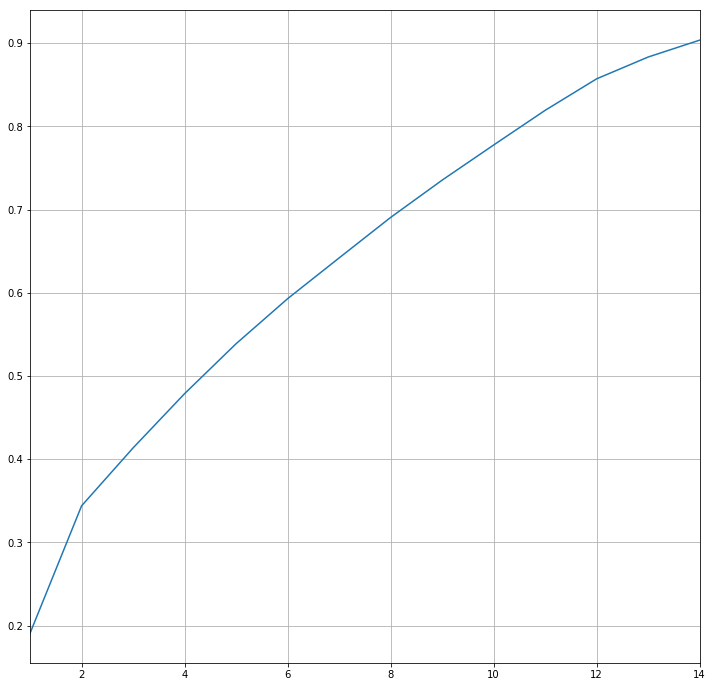

In [46]:
pd.Series(var_ratio_cat).plot()

###### PCA on scaled numerical data 

In [47]:
var_ratio_num_scaled={}
for n in range(1,5):
    pc=PCA(n_components=n)
    LR_num_pca=pc.fit(LR_num_scaled)
    var_ratio_num_scaled[n]=sum(LR_num_pca.explained_variance_ratio_)

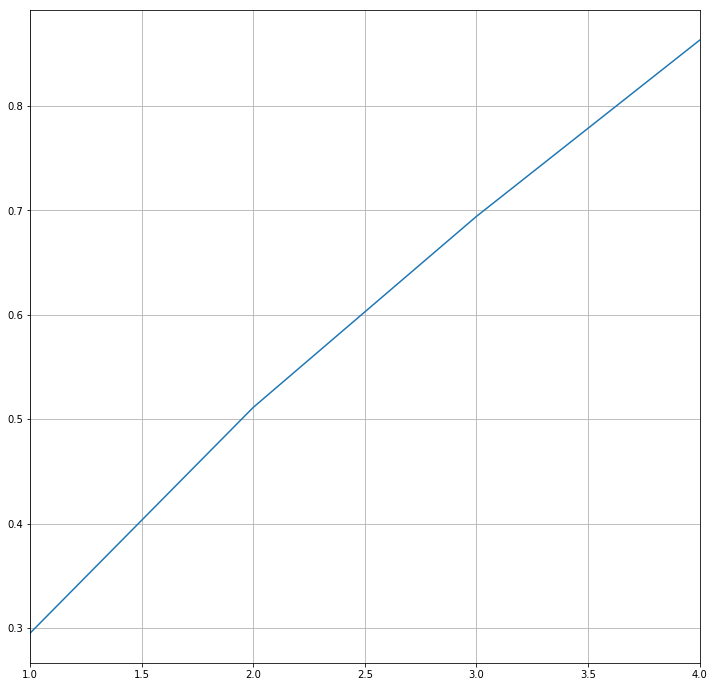

In [48]:
pd.Series(var_ratio_num_scaled).plot()

###### Final PCA

Combined data of Numerical and Categorical data gives us the least components along with 78% variance 
Hence we chose to go ahead with that using 6 components 

In [68]:
LR_pca_final=PCA(n_components=6).fit(LR_scalednum_cat)

reduced_LR=LR_pca_final.fit_transform(LR_scalednum_cat)

In [69]:
dd=pd.DataFrame(reduced_LR)
dd.head()

,0,1,2,3,4,5
0,-1.270030,3.182876,-0.280992,0.801502,-1.269200,0.188836
1,-1.737919,2.701957,-0.509623,0.998494,-1.642473,0.179155
2,-0.449534,3.358812,-1.530936,-0.318860,-1.080954,0.877422
3,0.226735,4.510922,-0.897037,-0.538340,0.112325,1.120017
4,-1.020216,3.011143,-0.356126,0.762448,-1.752614,-0.149106


In [70]:
col_list=renew_LR.columns

In [52]:
#LR_pca_final.components_

In [71]:
pd.DataFrame(LR_pca_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
Driver_Licence_Type_4,0.005040,-0.002342,0.000417,-0.005643,0.001539,0.005921
Driver_Licence_Type_5,-0.000130,0.000353,0.000506,-0.000122,-0.000249,0.001110
Driver_Licence_Type_6,0.000188,-0.001380,0.000902,-0.001062,0.000269,-0.000880
Driver_Marital_Status_M,-0.098849,0.045400,0.032624,0.041556,0.068394,-0.289779
Driver_Marital_Status_S,0.085998,-0.018167,-0.024610,-0.044509,-0.060891,0.156294
Driver_Marital_Status_W,-0.005103,-0.004761,-0.000268,-0.000200,0.002615,0.005233
Driver_Occupation_Status_F,0.000508,-0.000549,0.000489,0.000045,-0.000686,-0.000098
Driver_Occupation_Status_R,-0.038248,0.009597,-0.003928,0.018710,-0.008422,-0.007647
Driver_Occupation_Status_U,0.004407,0.016791,-0.004255,0.004372,0.000353,0.009439
First_Contact_Channel_T,0.003701,0.014134,-0.014326,0.014838,-0.002353,0.004451


In [72]:
pd.Series(LR_pca_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.218229
PC_1    0.157902
PC_2    0.133738
PC_3    0.123361
PC_4    0.100824
PC_5    0.050152
dtype: float64

#### Clustering using K means 

In [91]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
kmeans = km_4.fit(reduced_LR)
#kmeans
km_4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [92]:
ser=pd.Series(km_4.labels_).value_counts()
ser

1    6200
0    2041
2    1415
3     629
dtype: int64

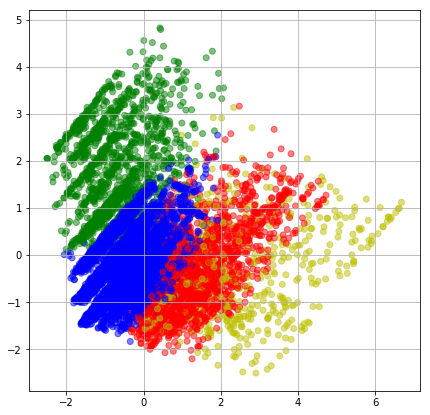

In [93]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_LR[:,0],reduced_LR[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [94]:
cluster_df_4=pd.concat([renew_LR[renew_LR_cols],pd.Series(km_4.labels_,name='Cluster')],axis=1)

In [59]:
cluster_df_4.head()

,Driver_Licence_Type_4,Driver_Licence_Type_5,Driver_Licence_Type_6,Driver_Marital_Status_M,Driver_Marital_Status_S,Driver_Marital_Status_W,Driver_Occupation_Status_F,Driver_Occupation_Status_R,Driver_Occupation_Status_U,First_Contact_Channel_T,...,Previous_Discount_1,Renewal_Offer_Type_Passive,Vehicle_Body_Type_C,Vehicle_Body_Type_S,No_Claims_Discount,Number_Of_Attempted_Policy_Ammendments,Previous_Renewals,Price_Change,IPO,Cluster
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,9,0.0,7,-0.012476,70.7800,2
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,9,0.0,7,0.088119,0.0000,2
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,7,0.0,7,0.206042,211.5370,2
3,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,9,0.0,7,0.004398,364.7076,2
4,0,1,0,0,1,0,0,1,0,1,...,1,1,0,0,8,0.0,7,-0.019960,52.0700,2


In [110]:
cluster_4=cluster_df_4.groupby('Cluster').apply(lambda x: x[renew_LR_cols].mean()).T
#cluster_4.to_excel("clusters.xlsx")
cluster_4

Cluster,0,1,2,3
Driver_Licence_Type_4,0.021558,0.008226,0.000707,0.012719
Driver_Licence_Type_5,0.002940,0.002581,0.002827,0.000000
Driver_Licence_Type_6,0.005879,0.004194,0.000000,0.003180
Driver_Marital_Status_M,0.287604,0.519194,0.592933,0.316375
Driver_Marital_Status_S,0.360608,0.136290,0.151237,0.311606
Driver_Marital_Status_W,0.012249,0.024677,0.016254,0.015898
Driver_Occupation_Status_F,0.000980,0.000806,0.000000,0.003180
Driver_Occupation_Status_R,0.031847,0.100968,0.156890,0.050874
Driver_Occupation_Status_U,0.025478,0.020000,0.081272,0.047695
First_Contact_Channel_T,0.024008,0.028065,0.077739,0.089030


In [121]:

IPO=np.log(cluster_4.loc['IPO',:].values)
Price_Change=(cluster_4.loc['Price_Change',:].values)
Previous_Renewals= (cluster_4.loc['Previous_Renewals',:].values)
Policy_Ammendments= (cluster_4.loc['Number_Of_Attempted_Policy_Ammendments',:].values)

First_Contact_Channel_T= (cluster_4.loc['First_Contact_Channel_T',:].values)
No_Claims_Discount= (cluster_4.loc['No_Claims_Discount',:].values)
Renewal_Offer_Passive= (cluster_4.loc['Renewal_Offer_Type_Passive',:].values)
Prev_Discount_1= (cluster_4.loc['Previous_Discount_1',:].values)

Geog_Area_3= (cluster_4.loc['Geographical_Area_3',:].values)
Geog_Area_4= (cluster_4.loc['Geographical_Area_4',:].values)
Geog_Area_6= (cluster_4.loc['Geographical_Area_6',:].values)
Geog_Area_8= (cluster_4.loc['Geographical_Area_8',:].values)
Geog_Area_9= (cluster_4.loc['Geographical_Area_9',:].values)
Geog_Area_11= (cluster_4.loc['Geographical_Area_11',:].values)

Licence_Type_4= (cluster_4.loc['Driver_Licence_Type_4',:].values)
Licence_Type_5= (cluster_4.loc['Driver_Licence_Type_5',:].values)
Licence_Type_6= (cluster_4.loc['Driver_Licence_Type_6',:].values)

Marital_Status_M= (cluster_4.loc['Driver_Marital_Status_M',:].values)
Marital_Status_S= (cluster_4.loc['Driver_Marital_Status_S',:].values)
Marital_Status_W= (cluster_4.loc['Driver_Marital_Status_W',:].values)

Occupation_Status_F= (cluster_4.loc['Driver_Occupation_Status_F',:].values)
Occupation_Status_R= (cluster_4.loc['Driver_Occupation_Status_R',:].values)
Occupation_Status_U= (cluster_4.loc['Driver_Occupation_Status_U',:].values)

Vehicle_Liability_3= (cluster_4.loc['New_Vehicle_Liability_3.0',:].values)
Vehicle_Liability_4= (cluster_4.loc['New_Vehicle_Liability_4.0',:].values)

Parking_3= (cluster_4.loc['Overnight_Parking_3',:].values)
Parking_4= (cluster_4.loc['Overnight_Parking_4',:].values)
Parking_5= (cluster_4.loc['Overnight_Parking_5',:].values)


Vehicle_Body_Type_C= (cluster_4.loc['Vehicle_Body_Type_C',:].values)
Vehicle_Body_Type_S= (cluster_4.loc['Vehicle_Body_Type_S',:].values)

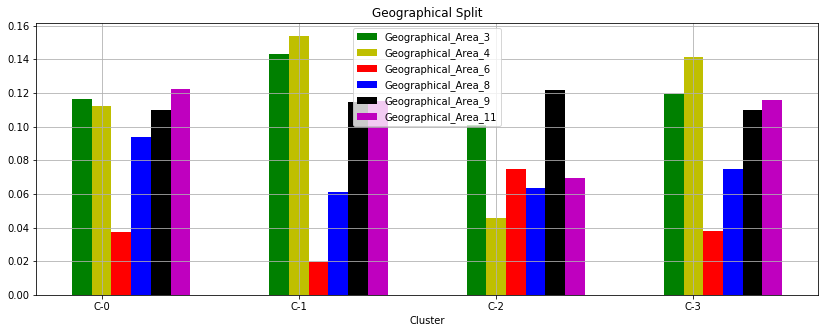

In [128]:
#Geographical Area
index=np.arange(len(cluster_4.columns))
fig,ax=plt.subplots(figsize=(14,5))
bar_width=.10
b1=plt.bar(index,Geog_Area_3,color='g',label='Geographical_Area_3',width=bar_width)
b2=plt.bar(index+bar_width,Geog_Area_4,color='y',label='Geographical_Area_4',width=bar_width)
b3=plt.bar(index+2*bar_width,Geog_Area_6,color='r',label='Geographical_Area_6',width=bar_width)
b4=plt.bar(index+3*bar_width,Geog_Area_8,color='b',label='Geographical_Area_8',width=bar_width)
b5=plt.bar(index+4*bar_width,Geog_Area_9,color='k',label='Geographical_Area_9',width=bar_width)
b6=plt.bar(index+5*bar_width,Geog_Area_11,color='m',label='Geographical_Area_11',width=bar_width)

plt.xlabel("Cluster")
plt.title("Geographical Split")
plt.xticks(index + bar_width, ('C-0', 'C-1', 'C-2', 'C-3'))
plt.legend()

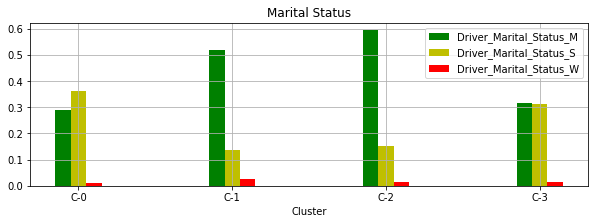

In [129]:
#Marital Status
index=np.arange(len(cluster_4.columns))
fig,ax=plt.subplots(figsize=(10,3))
bar_width=.10
b1=plt.bar(index,Marital_Status_M,color='g',label='Driver_Marital_Status_M',width=bar_width)
b2=plt.bar(index+bar_width,Marital_Status_S,color='y',label='Driver_Marital_Status_S',width=bar_width)
b3=plt.bar(index+2*bar_width,Marital_Status_W,color='r',label='Driver_Marital_Status_W',width=bar_width)

plt.xlabel("Cluster")
plt.title("Marital Status")
plt.xticks(index + bar_width, ('C-0', 'C-1', 'C-2', 'C-3'))
plt.legend()